# Water_Pumps_Data_Wrangling - EDA

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# To have multiple outputs in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load & merge datasets 

In [2]:
tr_l = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_l.csv', index_col = False)
tr_v = pd.read_csv('C:/Users/USER/Desktop/Springboard/DS_Python/Capstone/waterpumps/Data/train_v.csv', index_col = False)
tr = pd.merge(tr_v,tr_l, how = 'left', on = 'id')

In [3]:
tr.columns
tr.shape

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

(59400, 41)

## Explore data types & missing data

In [4]:
print(tr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [5]:
 tr.apply(lambda x: sum(x.isnull()),axis=0) 

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Drop unnecessary  variables


In [6]:
tr = tr.drop(['id','gps_height','wpt_name','num_private','subvillage','region_code','district_code','lga','ward',
       'recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality',
      'quantity_group','source','source_class','waterpoint_type_group'], axis=1)

In [7]:
tr.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type',
       'status_group'],
      dtype='object')

## Clean data

In [8]:
# Dealing with 'funder' column - find top 5 records

tr.funder.value_counts().head()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64

In [9]:
# funder has 3635 missing values. I need to reduce the number of levels and put the missing values in others

def funder_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
tr['funder'] = tr.apply(lambda row: funder_reduce(row), axis=1)

In [10]:
# Dealing with 'installer' column - find top 5 records

tr.installer.value_counts().head()

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

In [11]:
# installer has 3635 missing values. I need to reduce the number of levels and put the missing values in others

def installer_reduce(row):  
    '''Keep top 5 records and set the rest to other'''

    if row['installer']=='DWE':
        return 'Dwe'
    elif row['installer']=='Government':
        return 'Government'
    elif row['installer']=='RWE':
        return 'Rwe'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'Danida'    
    else:
        return 'other'
    
tr['installer'] = tr.apply(lambda row: installer_reduce(row), axis=1) 

In [12]:
# Dealing with 'public_meeting' column

tr.public_meeting.value_counts(dropna = False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

In [13]:
# public_meeting has 3334 missing values. I need to put them under unkown

tr.loc[tr['public_meeting'].isnull(), 'public_meeting'] = 'Unknown'


In [14]:
# Dealing with 'scheme_management' column

tr.scheme_management.value_counts(dropna = False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [15]:
# public_meeting has 3877 missing values. I need to put them under unkown

tr.loc[tr['scheme_management'].isnull(), 'scheme_management'] = 'Unknown'


In [16]:
# Dealing with 'permit' column

tr.permit.value_counts(dropna = False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

In [17]:
# permit has 3056 missing values. I need to put them under unkown

tr.loc[tr['permit'].isnull(), 'permit'] = 'Unknown'

In [18]:
# Convert the date_recorded to type datetime. Then change the column to represent the 
# number of days since the most recently recorded datum we have. Reason is: more recent recorded pumps
# might be likely be functional than non-functional or needed repair. 

tr.date_recorded = pd.to_datetime(tr.date_recorded)
tr.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [19]:
# Latest record is 2013-12-03. Subtract each date record from this date to get:
# 'days_since_recorded' column.

tr.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(tr.date_recorded)
tr.columns = ['days_since_recorded' if x=='date_recorded' else x for x in tr.columns]
tr.days_since_recorded = tr.days_since_recorded.astype('timedelta64[D]').astype(int)
tr.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [20]:
# Convert construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
tr['construction_year'] = tr.apply(lambda row: construction(row), axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


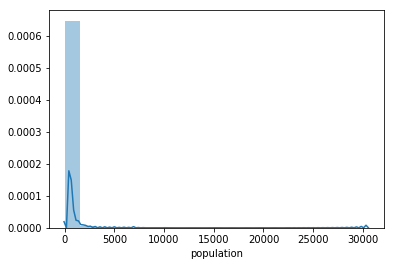

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [21]:
# Explore 'population'
sns.distplot(tr.population, bins = 20)
plt.show()

tr.population.describe()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


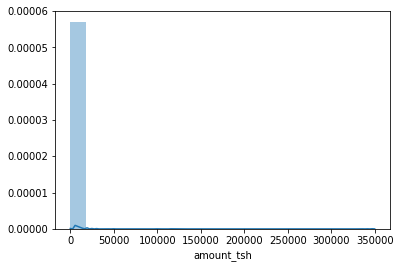

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [22]:
# Explore 'amount_tsh'
sns.distplot(tr.amount_tsh, bins = 20)
plt.show()

tr.amount_tsh.describe()

In [23]:
# Transform population & amount_tsh

def transform_data(data):
    # Transformation of variables if required or for testing
    tr['amount_tsh'] = tr.amount_tsh.apply(lambda x: np.log(x+1))
    tr['population'] = tr.population.apply(lambda x: np.log(x+1))
    return data

## Explore the data

In [24]:
tr.head(3)
tr.tail(3)
tr.shape

,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
0,6000.0,995,other,other,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,...,False,90s,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,0.0,272,other,other,34.698766,-2.147466,Lake Victoria,Mara,280,Unknown,...,True,10s,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,281,other,other,37.460664,-3.821329,Pangani,Manyara,250,True,...,True,00s,gravity,user-group,per bucket,good,enough,dam,communal standpipe multiple,functional


,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type,status_group
59397,0.0,967,other,other,34.017087,-8.750434,Rufiji,Mbeya,0,True,...,False,unknown,handpump,user-group,monthly,fluoride,enough,borehole,hand pump,functional
59398,0.0,1001,other,other,35.861315,-6.378573,Rufiji,Dodoma,0,True,...,True,unknown,handpump,user-group,never pay,good,insufficient,shallow well,hand pump,functional
59399,0.0,986,world_bank,other,38.104048,-6.747464,Wami / Ruvu,Morogoro,150,True,...,True,00s,handpump,user-group,on failure,salty,enough,shallow well,hand pump,functional


(59400, 21)

In [25]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment_type             59400 non-null object
quality_group            59400 non-null object
quantity                 59400 non-null object
source_type              59400 non-null obje

In [26]:
print(tr.describe())

          amount_tsh  days_since_recorded     longitude      latitude  \
count   59400.000000         59400.000000  59400.000000  5.940000e+04   
mean      317.650385           613.616970     34.077427 -5.706033e+00   
std      2997.574558           334.216374      6.567432  2.946019e+00   
min         0.000000             0.000000      0.000000 -1.164944e+01   
25%         0.000000           297.000000     33.090347 -8.540621e+00   
50%         0.000000           419.000000     34.908743 -5.021597e+00   
75%        20.000000           977.000000     37.178387 -3.326156e+00   
max    350000.000000          4068.000000     40.345193 -2.000000e-08   

         population  
count  59400.000000  
mean     179.909983  
std      471.482176  
min        0.000000  
25%        0.000000  
50%       25.000000  
75%      215.000000  
max    30500.000000  


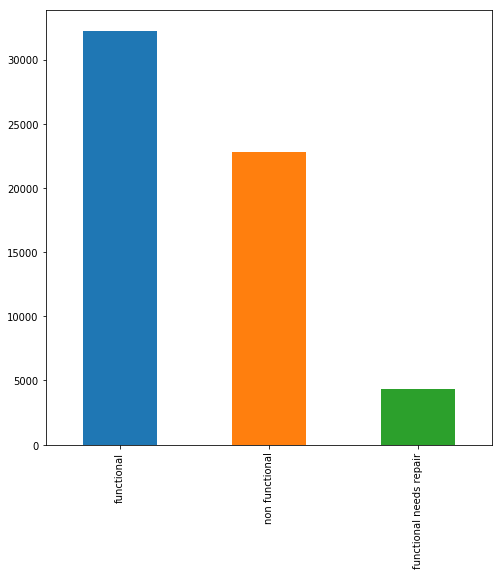

In [27]:
# to find out the count for the categories:

x = tr['status_group'].value_counts(dropna=False)
x.plot(kind="bar", figsize=(8,8))

In [28]:
# Top 5 regions ranked by total number of functional status group

fun = tr.loc[tr['status_group']=='functional'].groupby('region')
fun2 = fun['status_group'].value_counts().sort_values(ascending = False).head()
fun2

region       status_group
Iringa       functional      4141
Shinyanga    functional      2789
Kilimanjaro  functional      2640
Mbeya        functional      2319
Arusha       functional      2294
Name: status_group, dtype: int64

In [29]:
# Top 5 regions ranked by total number of non functional status group

non_fun = tr.loc[tr['status_group']=='non functional'].groupby('region')
non_fun2=non_fun['status_group'].value_counts().sort_values(ascending = False).head()
non_fun2

region       status_group  
Mbeya        non functional    1816
Morogoro     non functional    1587
Shinyanga    non functional    1558
Kilimanjaro  non functional    1417
Mwanza       non functional    1417
Name: status_group, dtype: int64

In [30]:
# Top 5 regions ranked by total number of need repair status group

rep = tr.loc[tr['status_group']=='functional needs repair'].groupby('region')
rep2= rep['status_group'].value_counts().sort_values(ascending = False).head()
rep2

region       status_group           
Shinyanga    functional needs repair    635
Kigoma       functional needs repair    603
Mbeya        functional needs repair    504
Kilimanjaro  functional needs repair    322
Kagera       functional needs repair    304
Name: status_group, dtype: int64

status_group,functional,functional needs repair,non functional
payment_type,,,
annually,2740,247,655
monthly,5482,927,1891
never pay,11379,1907,12062
on failure,2429,277,1208
other,611,118,325
per bucket,6090,409,2486
unknown,3528,432,4197


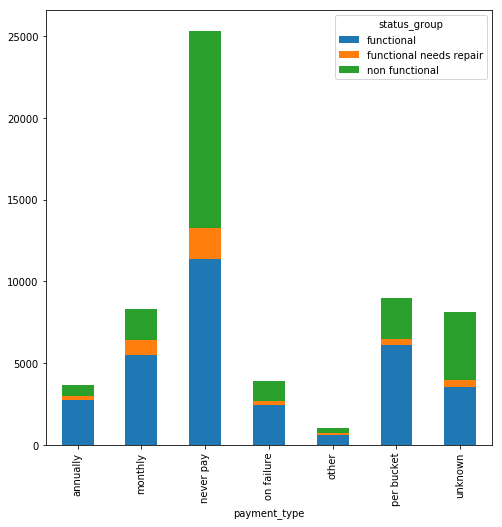

In [31]:
# Status_group vs payment_type

status_payment_table = pd.crosstab(index=tr["payment_type"], 
                          columns=tr["status_group"])

status_payment_table

status_payment_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

status_group,functional,functional needs repair,non functional
quality_group,,,
colored,246,54,190
fluoride,157,13,47
good,28760,3904,18154
milky,438,14,352
salty,2394,297,2504
unknown,264,35,1577


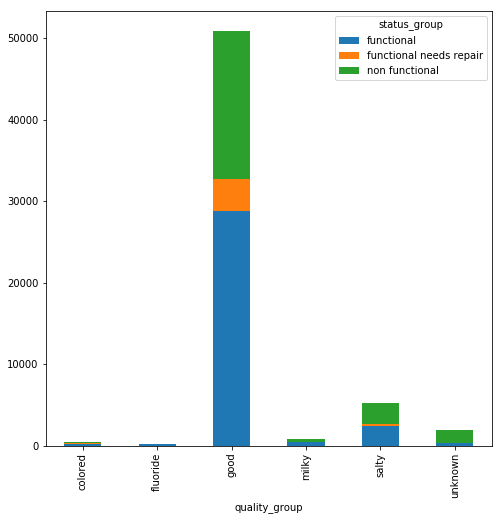

In [32]:
# Status_group vs quality_group

status_quality_table = pd.crosstab(index=tr["quality_group"], 
                          columns=tr["status_group"])

status_quality_table

status_quality_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,84,2,30
communal standpipe,17726,2260,8536
communal standpipe multiple,2235,648,3220
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136
other,840,293,5247


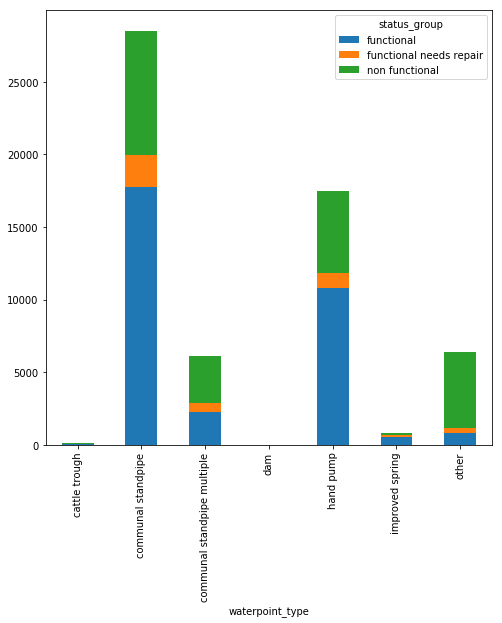

In [33]:
# Status_group vs water point

status_waterpoint_table = pd.crosstab(index=tr["waterpoint_type"], 
                          columns=tr["status_group"])

status_waterpoint_table

status_waterpoint_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

status_group,functional,functional needs repair,non functional
quantity,,,
dry,157,37,6052
enough,21648,2400,9138
insufficient,7916,1450,5763
seasonal,2325,416,1309
unknown,213,14,562


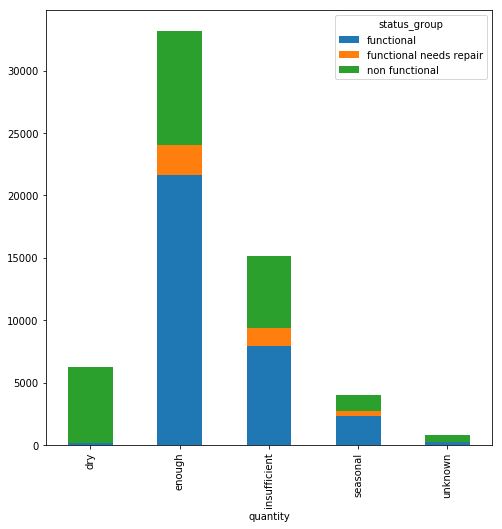

In [34]:
# Status_group vs quantity

status_quantity_table = pd.crosstab(index=tr["quantity"], 
                          columns=tr["status_group"])

status_quantity_table

status_quantity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

status_group,functional,functional needs repair,non functional
construction_year,,,
00s,9989,977,4364
10s,3794,220,1147
60s,156,42,340
70s,1406,348,2652
80s,2220,423,2935
90s,4139,518,3021
unknown,10555,1789,8365


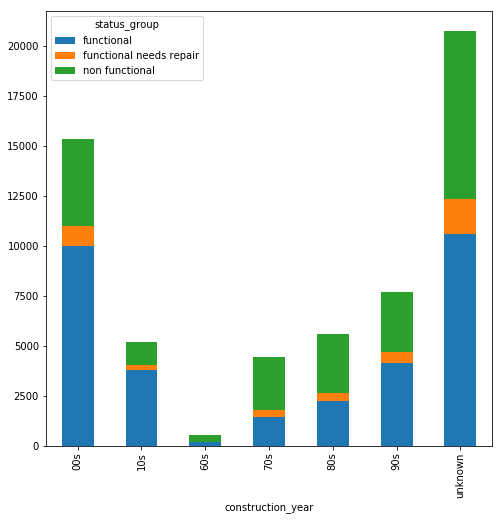

In [35]:
# Status_group vs construction_year

status_construction_table = pd.crosstab(index=tr["construction_year"], 
                          columns=tr["status_group"])

status_construction_table

status_construction_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

status_group,functional,functional needs repair,non functional
days_since_recorded,,,
0,196,8,36
1,10,0,23
2,1,0,0
30,129,15,50
31,16,0,8
61,106,2,30
62,33,2,20
91,167,0,42
92,8,1,23


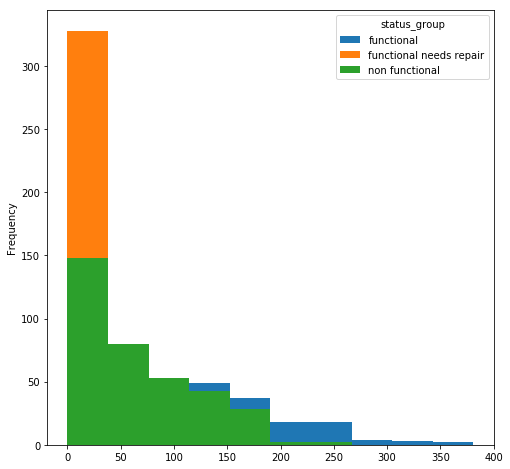

In [36]:
# Status_group vs days_since_recorded

status_recorded_table = pd.crosstab(index=tr["days_since_recorded"], 
                          columns=tr["status_group"])

status_recorded_table

status_recorded_table.plot(kind="hist", 
                 figsize=(8,8))

## Save the dataset

In [37]:
tr.to_csv('train.csv', index=False)